<a href="https://colab.research.google.com/github/Riddick4-droid/Machine_Learning-Pt/blob/main/PassengerForecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PASSENGER SALES FORECASTING-ARIMA MODEL COMPARISON

In [13]:
!pip install -U statsmodels -q

In [14]:
#load from kaggle hub
try:
    import kagglehub
    from kagglehub import KaggleDatasetAdapter
except ModuleNotFoundError:
    print(f'[INFO] module not found installing....')
    !pip install kagglehub[pandas-datasets]
    import kagglehub
    from kagglehub import KaggleDatasetAdapter

In [15]:
#set filepath for storage
file_path = '/content/passengers_dataset/AirPassengers.csv'

In [16]:
#download dataset
df = kagglehub.dataset_download(handle='chirag19/air-passengers',path='./')

Using Colab cache for faster access to the 'air-passengers' dataset.


In [17]:
!ls /kaggle/input/air-passengers

AirPassengers.csv


In [18]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [19]:
df = pd.read_csv("/kaggle/input/air-passengers/AirPassengers.csv",index_col='Month',parse_dates=True)

In [20]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

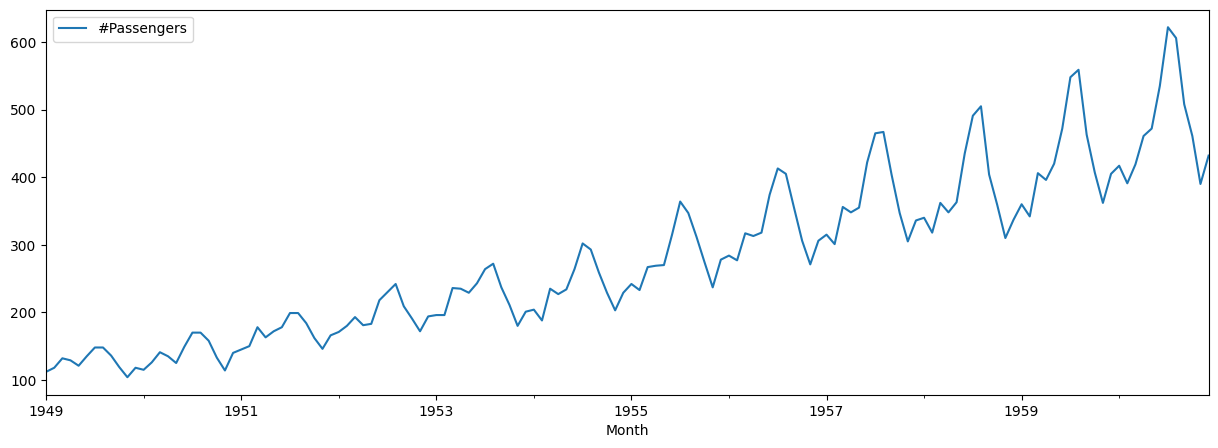

In [21]:
#plot the data
df.plot(figsize=(15,5))

In [22]:
#stationarize the dataset
df['first_diff'] = df['#Passengers'].diff()

In [23]:
df.head()

,#Passengers,first_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [24]:
##the first row of the diff column is nan because diff calculates change in price between the previous price and
##the next price

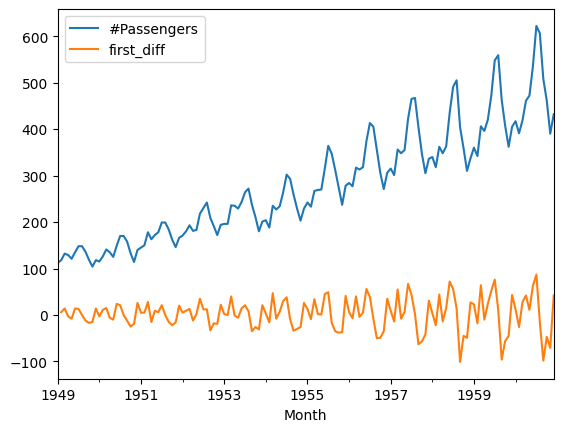

In [25]:
#visualize the dataset
df.plot();

In [26]:
##stattionarity is expected to be centered around 0 with minimum fluctuations
#the first diff is not so stationary as there is an increase in variations over time

In [27]:
#it is good practice to always use the log of prices or values as this ensures some form of
#uniformity and is similar to scaling in machine learning models

#calcluate log of values
df['Logpassengers'] = np.log(df['#Passengers'])

<Axes: xlabel='Month'>

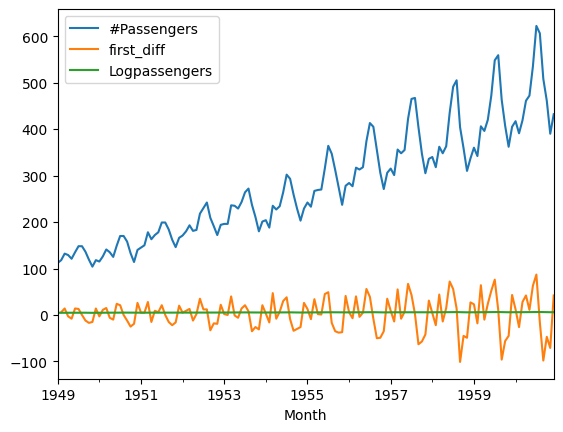

In [28]:
#visualize
#expect a more uniform and steady growth of the trend with miminum fluctuations as all
#data is now clipped into being similar using the log transform

df.plot()

<Axes: xlabel='Month'>

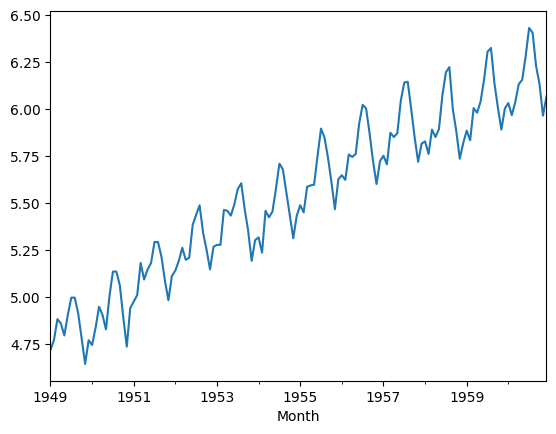

In [29]:
#visualize only the logged values
df['Logpassengers'].plot()

In [30]:
#set frequency of df index to months
df.index.freq = 'MS'

In [31]:
df.head()

,#Passengers,first_diff,Logpassengers
Month,,,
1949-01-01,112,NaN,4.718499
1949-02-01,118,6.0,4.770685
1949-03-01,132,14.0,4.882802
1949-04-01,129,-3.0,4.859812
1949-05-01,121,-8.0,4.795791


In [32]:
print(f'there are {df.shape[0]} of observations in the dataset')

there are 144 of observations in the dataset


In [33]:
#split data so that test set is just the final 12 months
last_12_months = 12

train = df[:-last_12_months]
test = df[-last_12_months:]

In [34]:
len(train),len(test)

(132, 12)

In [35]:
#create train idx and test idx to index our dataframe in the rows
train.tail()

,#Passengers,first_diff,Logpassengers
Month,,,
1959-08-01,559,11.0,6.326149
1959-09-01,463,-96.0,6.137727
1959-10-01,407,-56.0,6.008813
1959-11-01,362,-45.0,5.891644
1959-12-01,405,43.0,6.003887


In [36]:
test.head()

,#Passengers,first_diff,Logpassengers
Month,,,
1960-01-01,417,12.0,6.033086
1960-02-01,391,-26.0,5.968708
1960-03-01,419,28.0,6.037871
1960-04-01,461,42.0,6.133398
1960-05-01,472,11.0,6.156979


In [37]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [38]:
train.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1959-03-01', '1959-04-01', '1959-05-01', '1959-06-01',
               '1959-07-01', '1959-08-01', '1959-09-01', '1959-10-01',
               '1959-11-01', '1959-12-01'],
              dtype='datetime64[ns]', name='Month', length=132, freq='MS')

In [39]:
#any index where the index of the original df is less than the last index value for the train index
train_idx = df.index <= train.index[-1]

#any index where the index of the original df is greater than the last index of the train index
test_idx = df.index > train.index[-1]

In [40]:
train_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
##the above results show indexes where the value of the last index for the train dataset is lesser than

In [42]:
##test an AR(1) model
#current value in the time series depends linearly on the previous values-Auto regression

arima = ARIMA(train['#Passengers'],order=(1,0,0))

#fit
arima_result = arima.fit()

In [43]:
#call .predict() to obtain training predictions
df.loc[train_idx,'AR(1)'] = arima_result.predict(start=train.index[0],end=train.index[-1])

In [44]:
df.head()

,#Passengers,first_diff,Logpassengers,AR(1)
Month,,,,
1949-01-01,112,NaN,4.718499,262.490027
1949-02-01,118,6.0,4.770685,117.750054
1949-03-01,132,14.0,4.882802,123.520801
1949-04-01,129,-3.0,4.859812,136.985877
1949-05-01,121,-8.0,4.795791,134.100503


In [45]:
df.tail()

,#Passengers,first_diff,Logpassengers,AR(1)
Month,,,,
1960-08-01,606,-16.0,6.406880,NaN
1960-09-01,508,-98.0,6.230481,NaN
1960-10-01,461,-47.0,6.133398,NaN
1960-11-01,390,-71.0,5.966147,NaN
1960-12-01,432,42.0,6.068426,NaN


<Axes: xlabel='Month'>

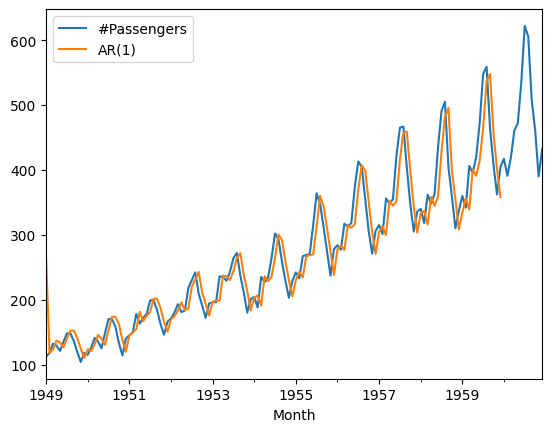

In [46]:
##visualize
df[['#Passengers','AR(1)']].plot()

In [47]:
##since we predict only up to the 2 last 12 months, we do not have any predictions for the final 12 months
##this is our test dataset

In [48]:
#now forecast for final 12 months using the train data patterns learned
##and compare to original test set

prediction_result = arima_result.get_forecast(last_12_months)
forecast = prediction_result.predicted_mean
df.loc[test_idx,'AR(1)'] = forecast

In [49]:
df.tail()

,#Passengers,first_diff,Logpassengers,AR(1)
Month,,,,
1960-08-01,606,-16.0,6.406880,366.839773
1960-09-01,508,-98.0,6.230481,362.852687
1960-10-01,461,-47.0,6.133398,359.017943
1960-11-01,390,-71.0,5.966147,355.329721
1960-12-01,432,42.0,6.068426,351.782421


<Axes: xlabel='Month'>

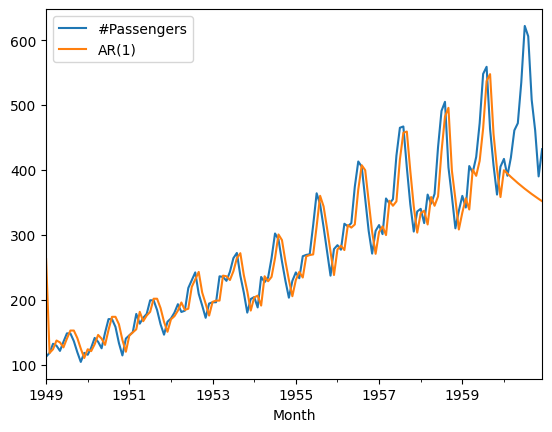

In [50]:
df[['#Passengers','AR(1)']].plot()

In [51]:
##the AR(1) model does not perform well in predicting or forecasting the data
##in does not even capture trend

In [52]:
#get confidence intervals for predicted values
prediction_result.conf_int()

,lower #Passengers,upper #Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [53]:
##a function that will plot the fitted values of the arima model along with the forecast
def forecast_fitted_values(predictions):
    fig,ax = plt.subplots(figsize=(15,5))
    ax.plot(df['#Passengers'],label='data')

    train_pred = predictions.fittedvalues
    ax.plot(train.index,train_pred,color='red',label='fitted/train')

    prediction_result = predictions.get_forecast(last_12_months)
    conf_int = prediction_result.conf_int()
    lower,upper = conf_int['lower #Passengers'],conf_int['upper #Passengers']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index,forecast,label='forecast')
    ax.fill_between(test.index,lower,upper,color='yellow',alpha=0.4)
    ax.legend()

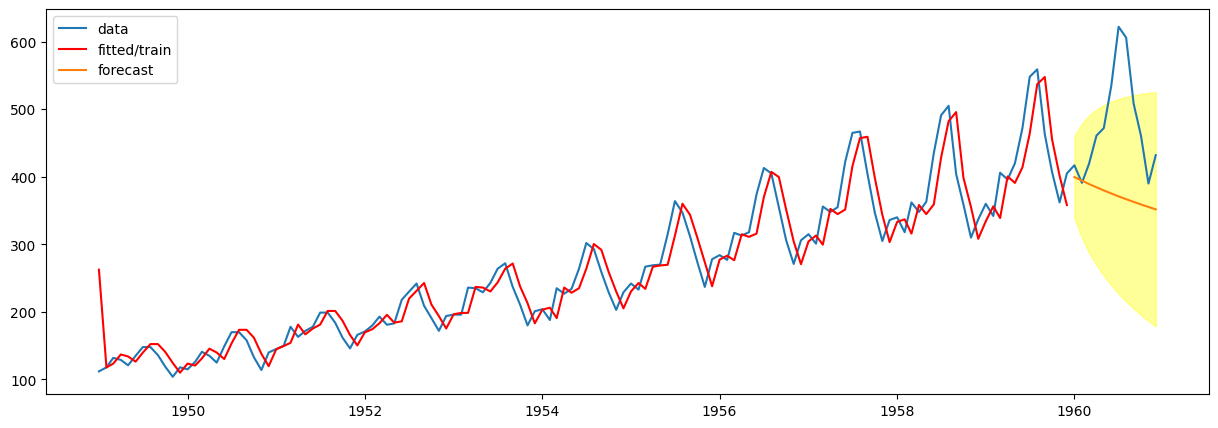

In [54]:
#test function
forecast_fitted_values(arima_result)

In [55]:
##using AR(1) means that our dataset sliding window only accounts for 1 dim that is D==p

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


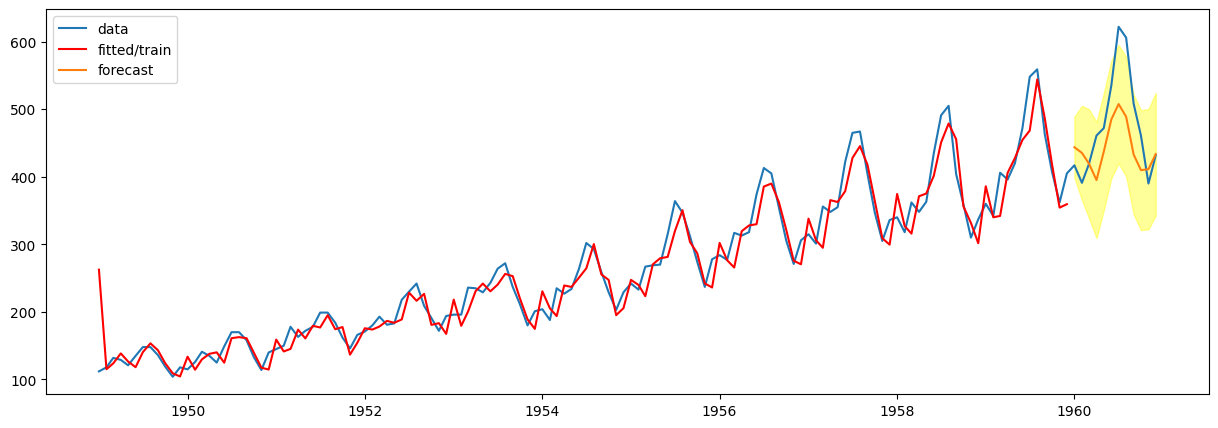

In [56]:
##increase the order p=10
arima_result = ARIMA(train['#Passengers'],order=(10,0,0)).fit()

#visualize
forecast_fitted_values(arima_result)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


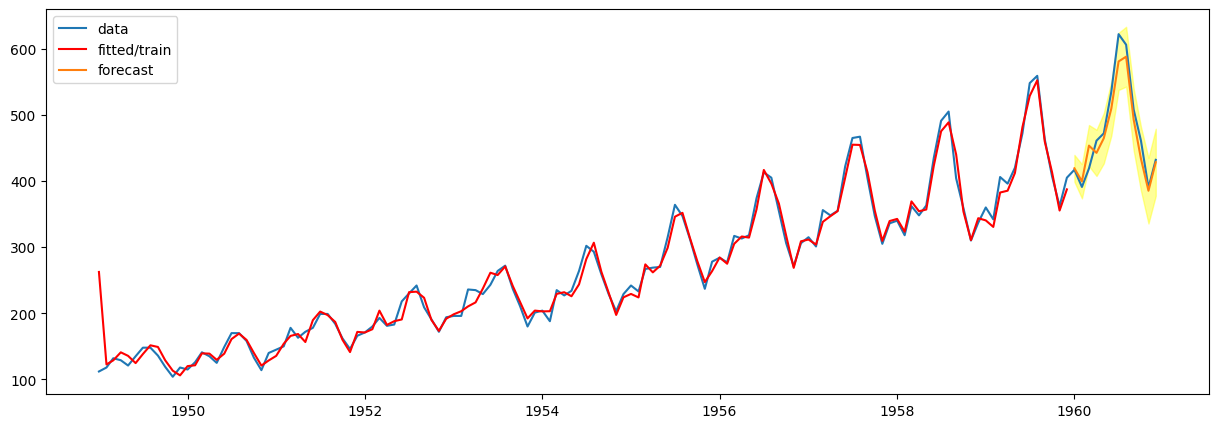

In [57]:
##increase the data sliding window from 10, to 15
arima_result = ARIMA(train['#Passengers'],order=(15,0,0)).fit()
forecast_fitted_values(arima_result)

In [58]:
##as we see with the AR(15)model, the model learns to not only forecast properly but also take note of the true trend slightly
##better than AR(1) and AR(10)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


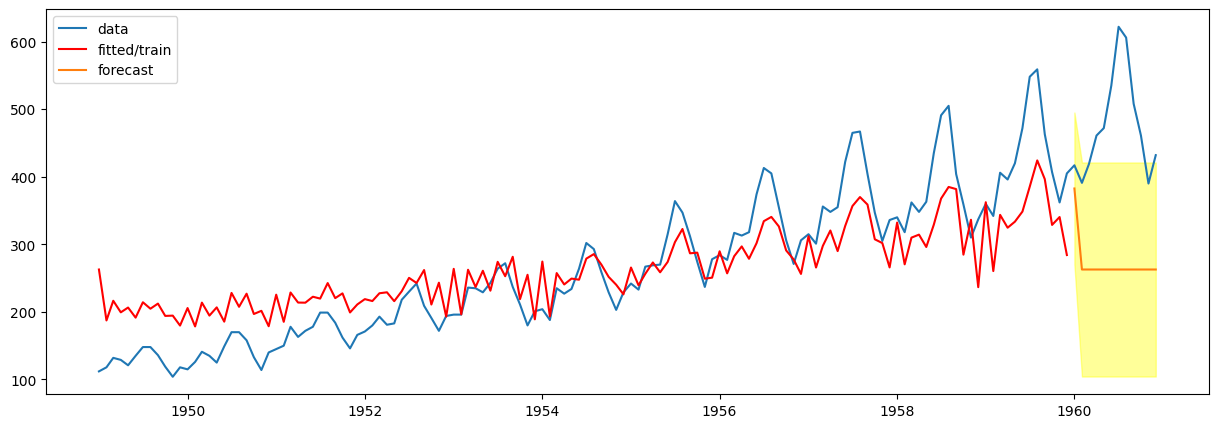

In [59]:
##test for MA(1)===Moving Average of order 1
arima_result = ARIMA(train['#Passengers'],order=(0,0,1)).fit()

#visualize
forecast_fitted_values(arima_result)

In [60]:
##in any machine learning model it is best practice to always scale data
##use log transform in the case of time series analysis
df['Logpassengers_diff'] = df['Logpassengers'].diff()

In [61]:
df.head()

,#Passengers,first_diff,Logpassengers,AR(1),Logpassengers_diff
Month,,,,,
1949-01-01,112,NaN,4.718499,262.490027,NaN
1949-02-01,118,6.0,4.770685,117.750054,0.052186
1949-03-01,132,14.0,4.882802,123.520801,0.112117
1949-04-01,129,-3.0,4.859812,136.985877,-0.022990
1949-05-01,121,-8.0,4.795791,134.100503,-0.064022


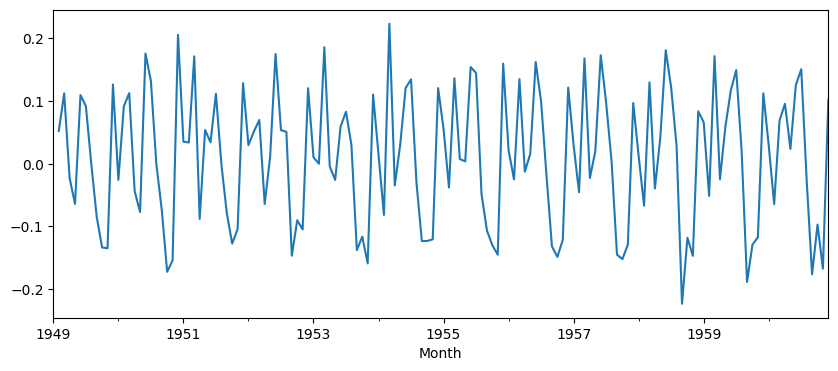

In [62]:
##visualize stationarity
df['Logpassengers_diff'].plot(figsize=(10,4));

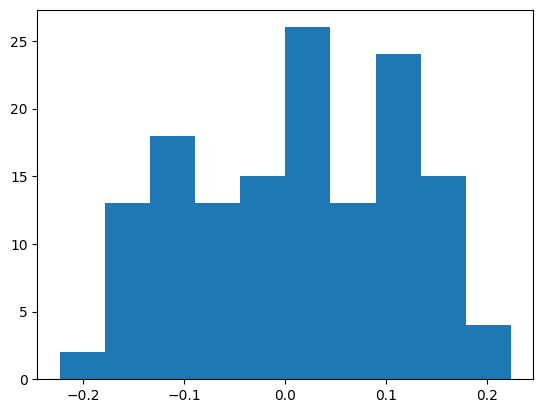

In [63]:
##stationary implies constant distribution for all values over time
#hence there is no chnage in mean, std or variance over time
plt.hist(df['Logpassengers_diff'],bins=None);

In [64]:
##the first diff does not show constant distribution

In [65]:
##now i will test the full ARIMA model that takes into account the full components p,d,q

In [66]:
#creating a more general plot function for both fitted and forecast values

def general_plot_function(predictions,d,col:str):
    fig,ax = plt.subplots(figsize=(15,5))
    #first plot entire data
    ax.plot(df[col],label='data')

    #plot fitted values
    train_pred = predictions.predict(start=train.index[d],end=train.index[-1])
    ax.plot(train.index[d:], train_pred, color='red',label='fitted/train',linestyle='--')

    #forecast values
    prediction_result = predictions.get_forecast(last_12_months)
    forecast = prediction_result.predicted_mean
    conf_int = prediction_result.conf_int()
    lower,upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    ax.plot(test.index,forecast,label='forecast')

    #plot confidence interval
    ax.fill_between(test.index,lower,upper,color='yellow',alpha=0.4)
    ax.legend()

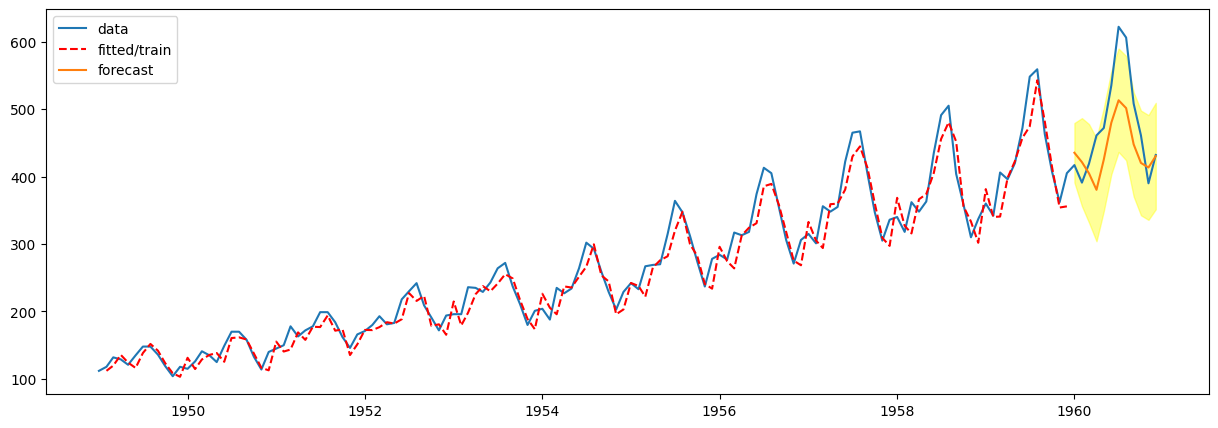

In [67]:
arima_result_811 = ARIMA(train['#Passengers'],order=(8,1,1)).fit()

#use the general plot function
general_plot_function(arima_result_811,1,col='#Passengers')

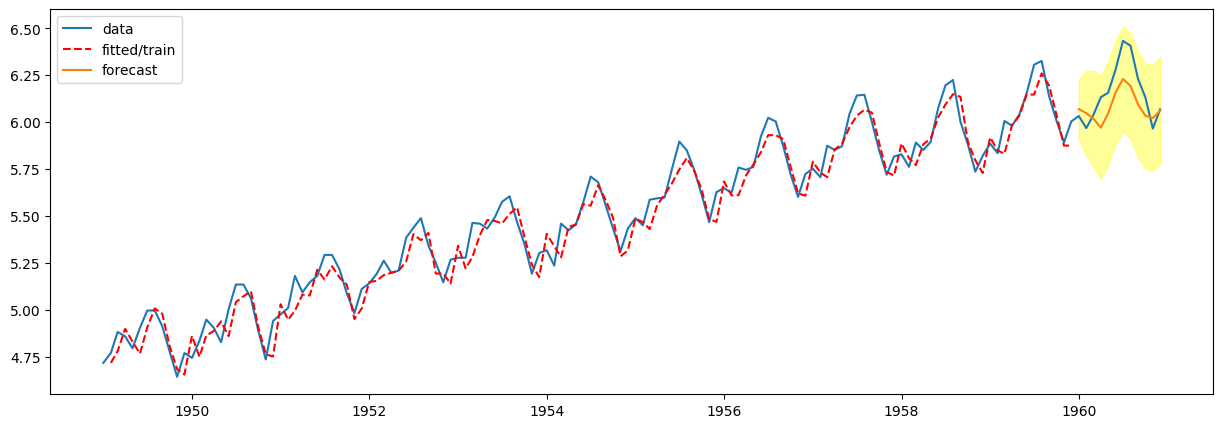

In [68]:
##testing on the LogPassengers data
arima_result_811_logged = ARIMA(train['Logpassengers'],order=(8,1,1)).fit()

#use the general plot function
general_plot_function(arima_result_811_logged,1,col='Logpassengers')

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


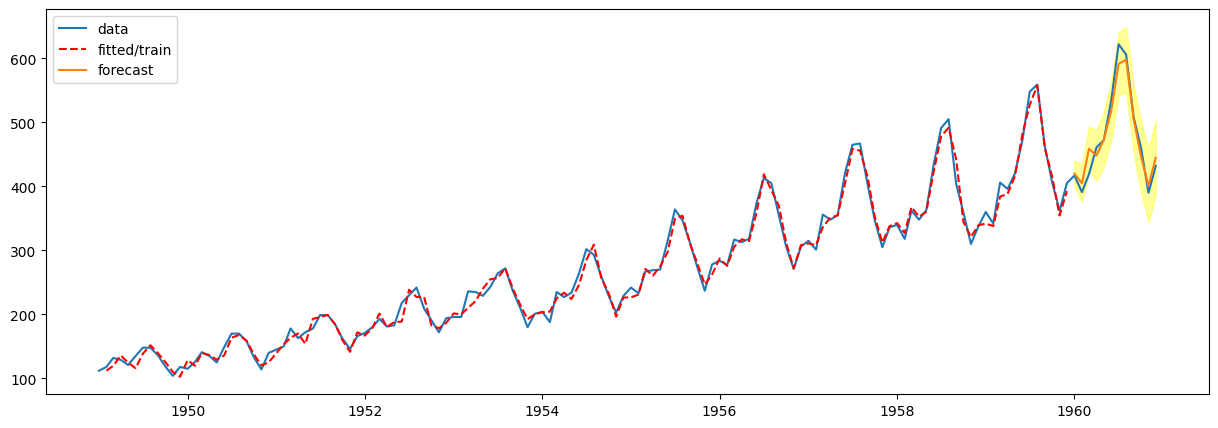

In [69]:
##ARIMA(12,1,0)===p=12,d=1,q=0
arima_result_1210_nolog = ARIMA(train['#Passengers'],order=(12,1,0)).fit()

#visualize
general_plot_function(arima_result_1210_nolog,1,col='#Passengers')

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


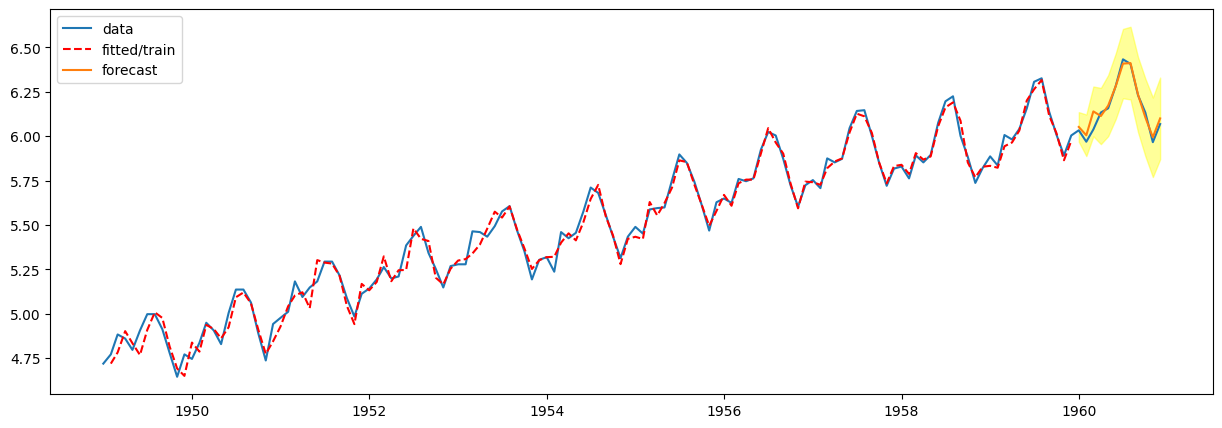

In [70]:
##for logged values
##ARIMA(12,1,0)===p=12,d=1,q=0
arima_result_1210_logged = ARIMA(train['Logpassengers'],order=(12,1,0)).fit()

#visualize
general_plot_function(arima_result_1210_logged,1,col='Logpassengers')

In [71]:
##test with diff d=2
df['second_diff'] = df['first_diff'].diff()

In [72]:
df.head()

,#Passengers,first_diff,Logpassengers,AR(1),Logpassengers_diff,second_diff
Month,,,,,,
1949-01-01,112,NaN,4.718499,262.490027,NaN,NaN
1949-02-01,118,6.0,4.770685,117.750054,0.052186,NaN
1949-03-01,132,14.0,4.882802,123.520801,0.112117,8.0
1949-04-01,129,-3.0,4.859812,136.985877,-0.022990,-17.0
1949-05-01,121,-8.0,4.795791,134.100503,-0.064022,-5.0


Text(0.5, 1.0, 'diff of order 2')

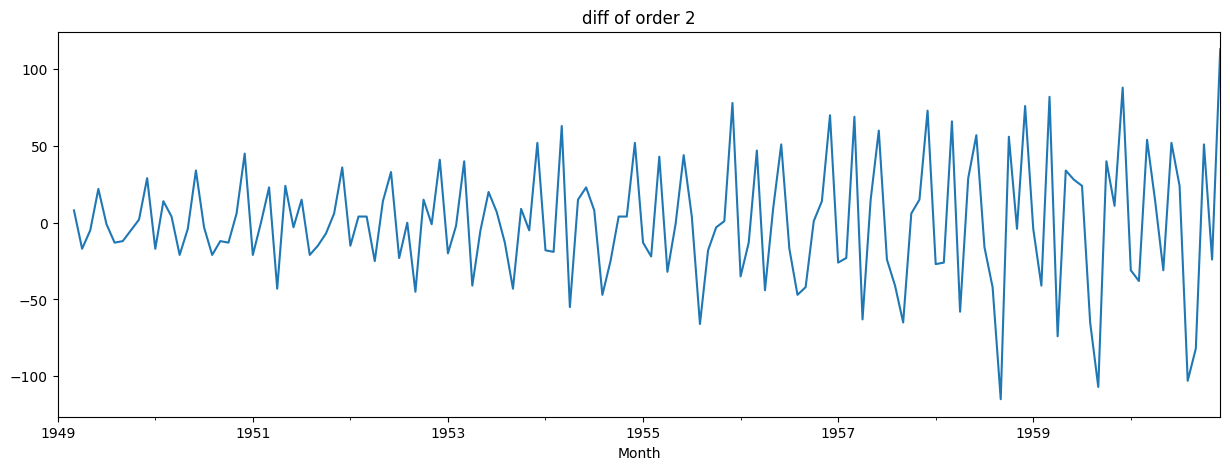

In [73]:
df['second_diff'].plot(figsize=(15,5));
plt.title('diff of order 2')

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


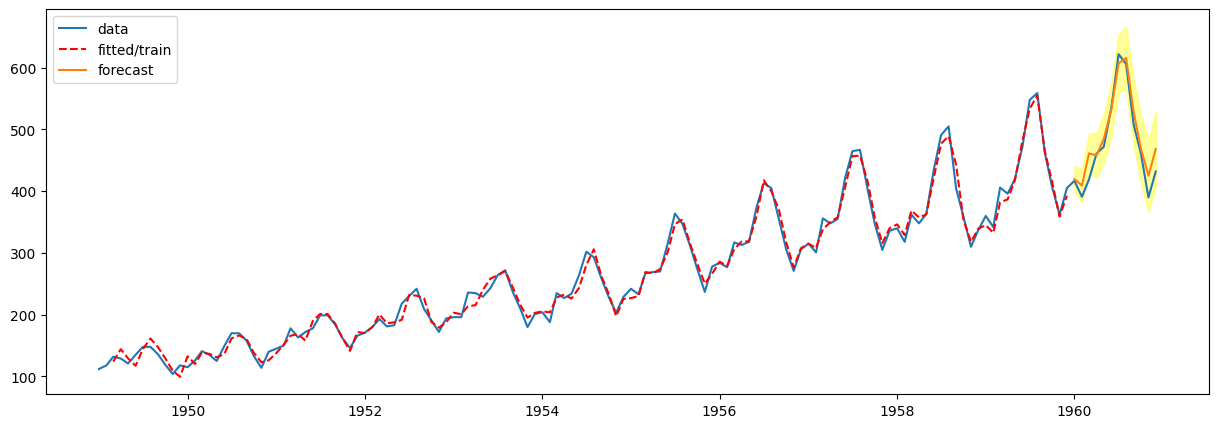

In [74]:
#fit model with diff 2
arima_result_diff_2 = ARIMA(train['#Passengers'],order=(12,2,0)).fit()

#visualize
general_plot_function(arima_result_diff_2,2,col='#Passengers')

In [75]:
##metrics===RMSE
##for regression values RMSE is the metric to go besides r2 score

def rmse(result,logged=False):
    forecast  = result.forecast(last_12_months)
    if logged==True:
        forecast = np.exp(forecast)
    t = test['#Passengers']
    y = forecast
    return np.sqrt(np.mean((t-y)**2))

In [2]:
##check performance for all fits
print('ARIMA(8,1,1)',rmse(arima_result_811,False))
print('ARIMA(8,1,1) logged',rmse(arima_result_811_logged,True))
print('ARIMA(12,1,0)',rmse(arima_result_1210_nolog,False))
print('ARIMA(12,1,0) logged',rmse(arima_result_1210_logged,True))
print('ARIMA(12,2,0)',rmse(arima_result_diff_2,False))

NameError: name 'rmse' is not defined

In [77]:
#best model so far is a logged-value ARIMA (12,1,0)

In [1]:
import pmdarima as pm

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject